## Example of using the Streetscape class

https://docs.momepy.org/en/stable/examples/streetscape.html

The class is designed for morphological streetscape analysis, focusing on generating nd analyzing streetscape measures based on sight points and sightlines. It attempts to capture the space from the pedestrian point of view.

In [2]:
import geopandas as gpd
import momepy
import numpy as np
import osmnx as ox
import rioxarray

Read all the data. Only streets and buildings are required.

In [3]:
streets = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="streets"
).to_crs(5514)
buildings = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="buildings"
).to_crs(5514)
plots = gpd.read_file(
    momepy.datasets.get_path("bubenec"), layer="plots"
).to_crs(5514)
dtm = rioxarray.open_rasterio(momepy.datasets.get_path("bubenec"), layer="dtm")

Mimic data on building category and height.

In [4]:
buildings["category"] = np.random.randint(0, 6, len(buildings))
buildings["height"] = np.random.randint(12, 30, len(buildings))

Initiate the class. This will dricectly compute builk of the sightline indicators based on streets and buildings.

In [5]:
sc = momepy.Streetscape(
    streets, buildings, category_col="category", height_col="height"
)

If you have plots and DTM, you can use two additional methods to compute additional variables.

In [9]:
sc.compute_plots(plots)
sc.compute_slope(dtm)

The resulting data can be extracted either on a street level:

In [10]:
street_df = sc.street_level()
street_df.head()

,N,n_l,n_r,left_os,right_os,os,left_os_std,right_os_std,os_std,left_os_mad,...,plot_WP_ratio,left_plot_WP_ratio,right_plot_WP_ratio,left_plot_seq_sb_index,right_plot_seq_sb_index,slope_degree,slope_percent,n_slopes,slope_valid,geometry
street_index,,,,,,,,,,,,,,,,,,,,,
0,57,28,38,33.607135,38.163914,71.771049,14.794107,12.059253,13.436283,13.873261,...,0.170662,0.156054,0.184501,"{96, 101, 103, 104, 82, 308, 87, 89, 92}","{102, 105, 309, 310, 311, 383}",2.809318,0.049073,57,True,"LINESTRING (-743681.992 -1040957.169, -743809...."
1,22,0,19,50.000000,17.497487,67.497487,0.000000,14.015687,9.794670,0.000000,...,0.255912,0.284263,0.230261,"{242, 243}","{240, 238, 239}",0.166605,0.002908,22,True,"LINESTRING (-743916.081 -1041162.952, -743899...."
2,43,36,21,13.907200,35.792031,49.699231,16.207022,15.188099,15.613165,11.913767,...,0.200568,0.221176,0.181546,"{78, 79, 80, 81, 82, 308}","{83, 87, 311, 89, 90}",1.122029,0.019587,43,True,"LINESTRING (-743689.806 -1041115.822, -743698...."
3,24,0,0,50.000000,48.865531,98.865531,0.000000,4.101247,2.869002,0.000000,...,0.156703,0.060853,0.248559,"{380, 381, 382}","{385, 103}",2.735747,0.047794,24,True,"LINESTRING (-743618.342 -1040934.607, -743621...."
4,15,0,0,50.000000,50.000000,100.000000,0.000000,0.000000,0.000000,0.000000,...,0.068937,0.050164,0.058499,"{390, 391, 398, 400, 401, 404}","{388, 391, 401, 403, 404}",1.505840,0.026294,15,True,"LINESTRING (-743701.515 -1040870.813, -743693...."


It is a GeoDataFrame, so you can directly plot it.

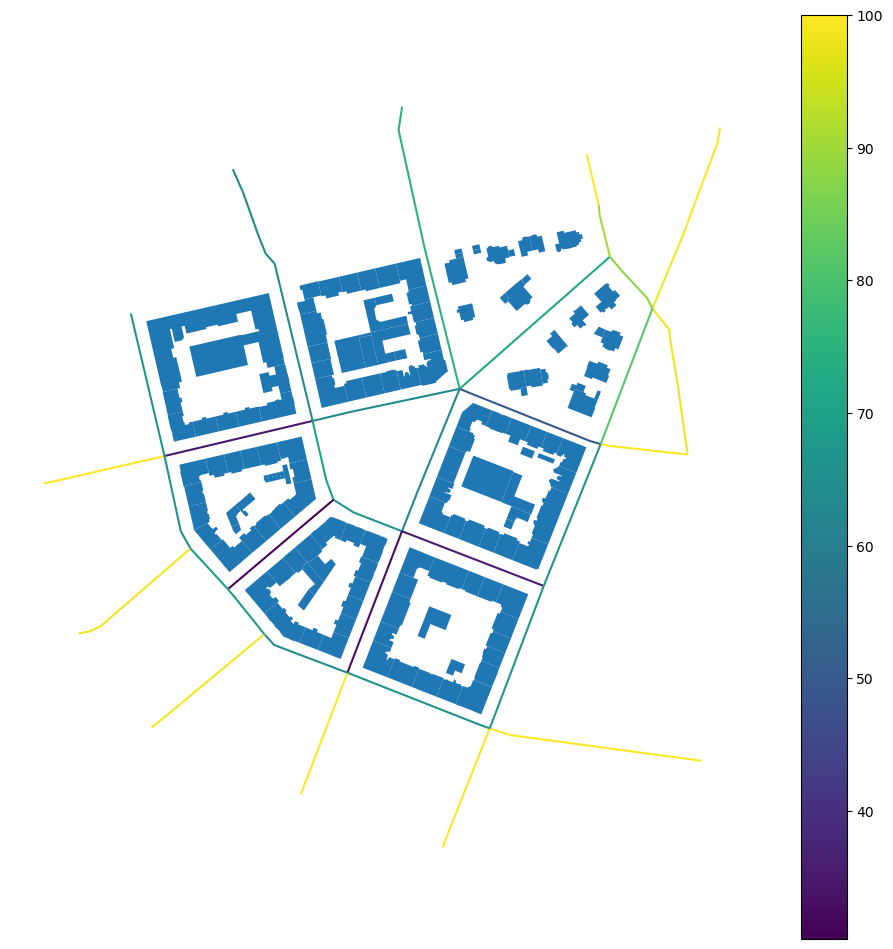

In [11]:
ax = street_df.plot("os", figsize=(12, 12), legend=True)
buildings.plot(ax=ax).set_axis_off()

Or for all individual sightline points.


In [12]:
point_df = sc.point_level()
point_df.head(10)

,geometry,left_os_count,left_os,left_sb_count,left_sb,left_h,left_hw,left_bc,right_os_count,right_os,...,right_plot_seq_sb_index,os_count,os,sb_count,sb,h,hw,bc,plot_seq_sb,plot_seq_sb_depth
street_index,,,,,,,,,,,,,,,,,,,,,
0,POINT (-743682.367 -1040957.500),1,50.000000,0,NaN,NaN,NaN,0.000000,1,50.000000,...,{383},2,50.000000,0,NaN,NaN,NaN,0.000000,14.568200,19.240118
0,POINT (-743684.627 -1040959.485),1,50.000000,0,NaN,NaN,NaN,0.000000,1,50.000000,...,{383},2,50.000000,0,NaN,NaN,NaN,0.000000,10.090066,18.011884
0,POINT (-743686.886 -1040961.471),1,50.000000,0,NaN,NaN,NaN,0.000000,1,27.593446,...,{383},2,38.796723,1,27.593446,28.0,1.014734,2.491801,10.100149,15.658901
0,POINT (-743689.145 -1040963.457),1,50.000000,0,NaN,NaN,NaN,0.000000,1,26.229691,...,{383},2,38.114846,1,26.229691,28.0,1.067493,5.604209,9.996735,27.216748
0,POINT (-743691.405 -1040965.443),1,50.000000,0,NaN,NaN,NaN,0.000000,1,25.412462,...,{383},2,37.706231,1,25.412462,28.0,1.101822,6.825341,9.996961,32.570991
0,POINT (-743693.664 -1040967.428),1,23.978541,0,NaN,NaN,NaN,6.557431,1,25.198986,...,{383},2,24.588764,1,25.198986,28.0,1.111156,11.811294,9.997186,29.171224
0,POINT (-743695.923 -1040969.414),1,14.720375,0,NaN,NaN,NaN,15.763951,1,26.764536,...,{383},2,20.742455,1,26.764536,28.0,1.046160,16.722367,9.997412,25.070210
0,POINT (-743698.182 -1040971.400),1,14.705134,0,NaN,NaN,NaN,16.541363,1,28.184169,...,{383},2,21.444652,1,28.184169,28.0,0.993466,15.669026,9.997637,21.235336
0,POINT (-743700.442 -1040973.386),1,14.689893,0,NaN,NaN,NaN,19.812513,1,29.961410,...,{383},2,22.325652,1,29.961410,28.0,0.934535,13.593521,9.997863,24.073478


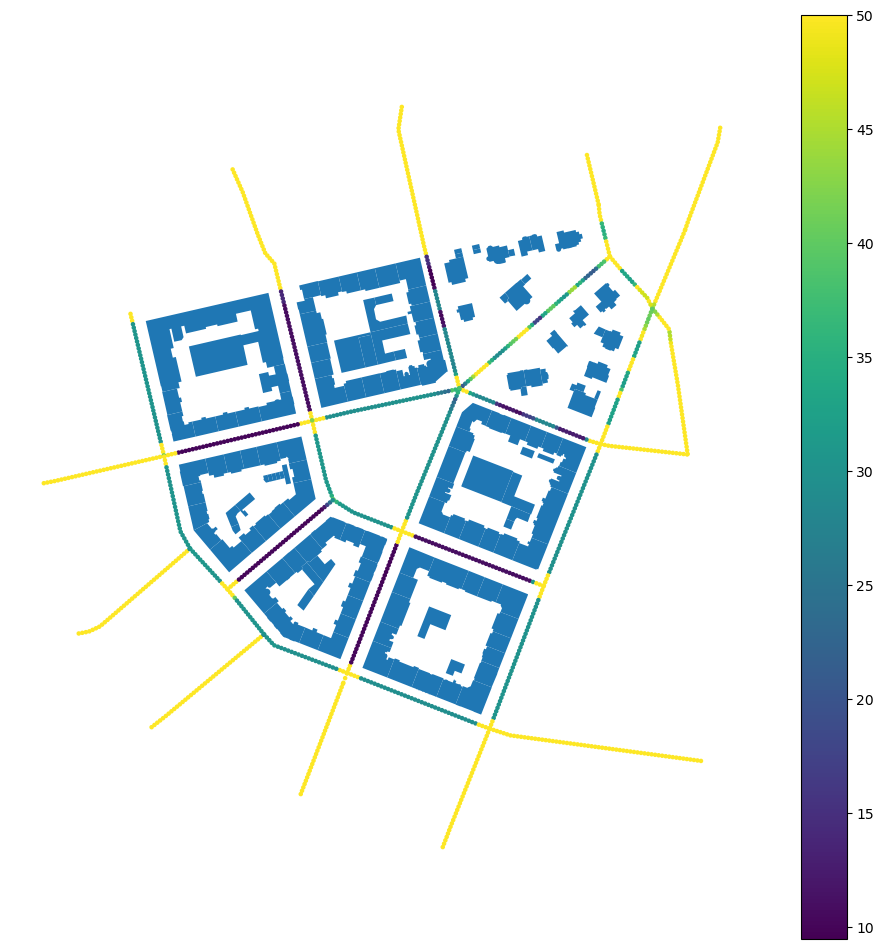

In [13]:
ax = point_df.plot("os", figsize=(12, 12), legend=True, markersize=5)
buildings.plot(ax=ax).set_axis_off()

## Using OpenStreetMap data

You can also use any other data. If you fetch buildings and streets from OSM, you can measure a subset of characters depending on those.

In [14]:
gdf = ox.features_from_place("Kahla, Germany", tags={"building": True})
buildings = ox.projection.project_gdf(gdf).reset_index()

streets_graph = ox.graph_from_place("Kahla, Germany", network_type="drive")
streets_graph = ox.projection.project_graph(streets_graph)
edges = ox.graph_to_gdfs(
    streets_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True,
).reset_index(drop=True)

Initiate the class. This time without additional arguments as OSM does not contain category or reliable height.

In [15]:
sc = momepy.Streetscape(edges, buildings)

c:\Users\Andrea\miniconda3\envs\urban\lib\site-packages\momepy\streetscape.py:288: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prof_st = (seg_mid.x + float(vec_anti[0]), seg_mid.y + float(vec_anti[1]))
c:\Users\Andrea\miniconda3\envs\urban\lib\site-packages\momepy\streetscape.py:290: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  seg_mid.x + float(vec_clock[0]),
c:\Users\Andrea\miniconda3\envs\urban\lib\site-packages\momepy\streetscape.py:291: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (

The measurememnt happens on class initialisation. Now you can simply extract it either on a street level:

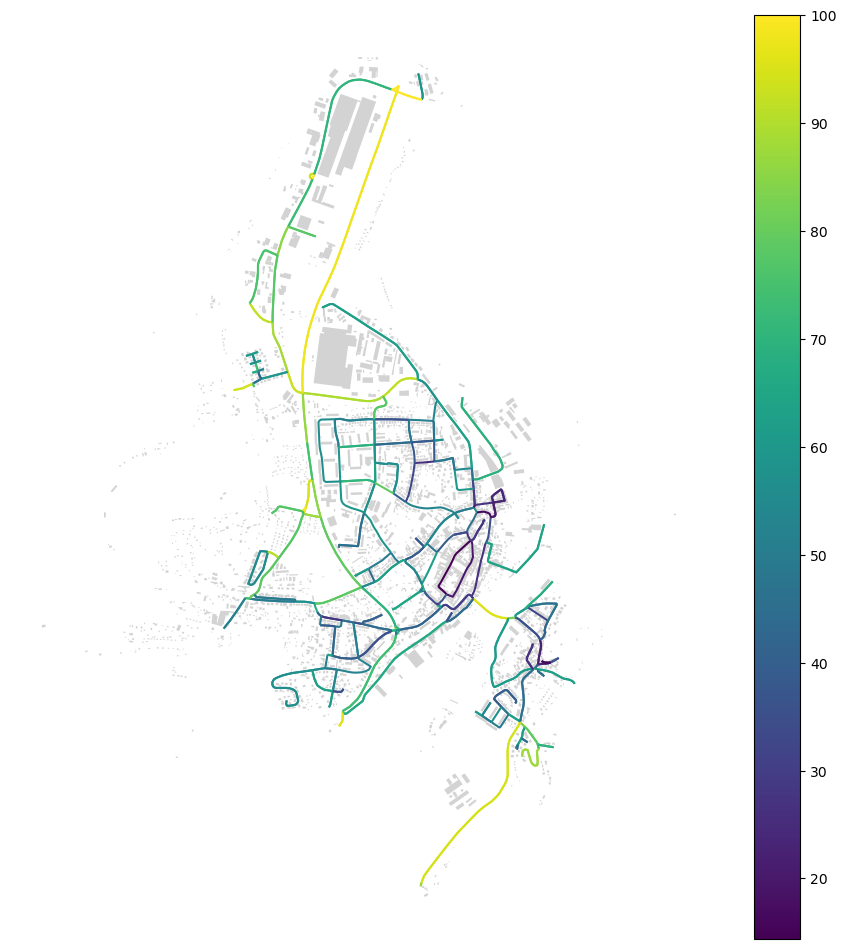

In [16]:
street_df = sc.street_level()

ax = street_df.plot("os", figsize=(12, 12), legend=True)
buildings.plot(ax=ax, color="lightgray").set_axis_off()

Or on a point level, as before.

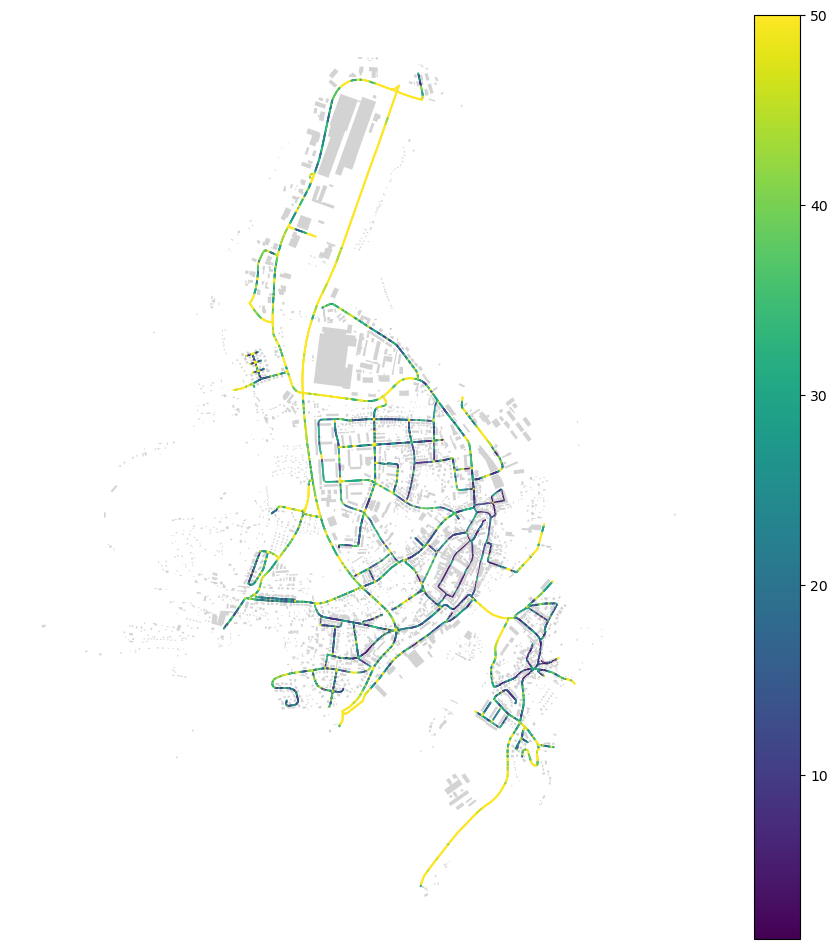

In [17]:
point_df = sc.point_level()

ax = point_df.plot("os", figsize=(12, 12), legend=True, markersize=0.1)
buildings.plot(ax=ax, color="lightgray").set_axis_off()